<a href="https://colab.research.google.com/github/SaiHarshitha-192/House-Price-Pridiction/blob/main/House_Price_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'VE TRAINED MODEL USING **LINEAR REGRESSION, DECISION TREES, RANDOM FOREST, SVM and KNN**.<br>
I've found out that **KNN** classifies the best as it had better accuracy and predicted almost the same.<br>
I've calculated **training, testing, validation accuracies** for all classifiers.<br>
Then made a table to compare the estimated values and acutal values for each classifier.<br>
Have also plotted graphs between estimated and actual values <br>

#Importing Libraries

In [93]:
#importing required libraries 

import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

from sklearn import svm
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [94]:
#reading the dataset
df = pd.read_excel("/content/drive/MyDrive/DS - Assignment Part 1 data set.xlsx")

# Printing first 5 records of the dataset
df.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


#True values of dataset - data exploration

In [95]:
df.shape

(414, 9)

In [96]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [98]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 3
Float variables: 6


In [99]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

#DATA VISUALIZATION

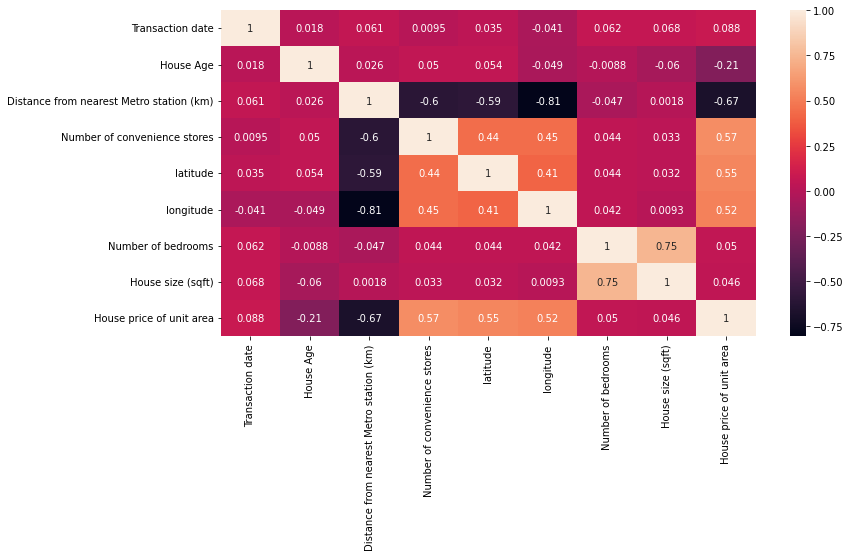

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)

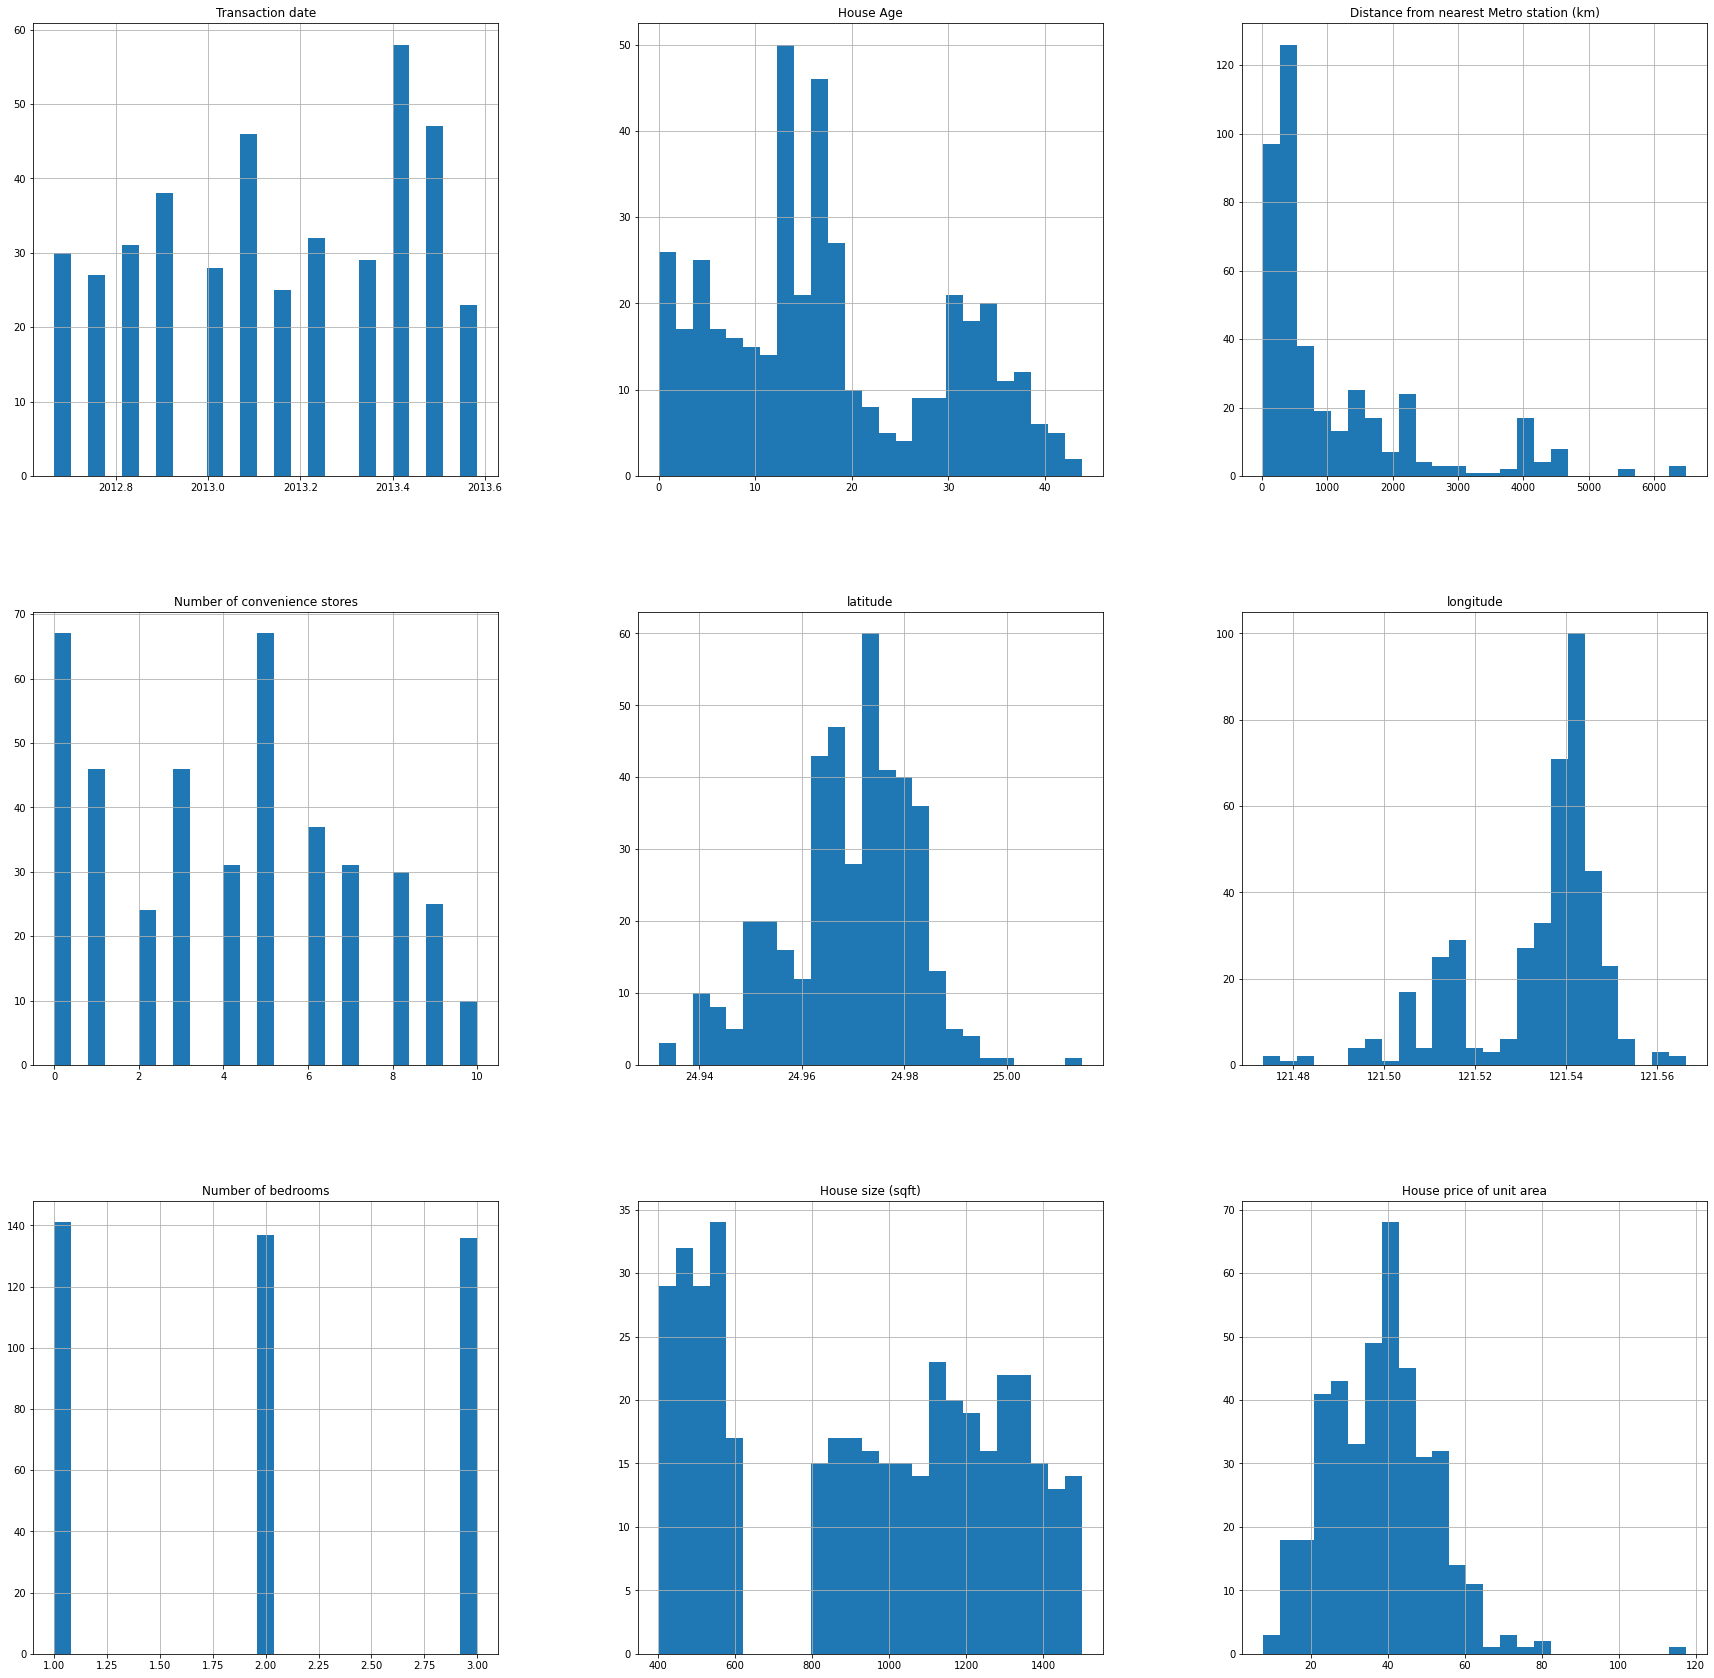

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(30,30))
plt.show()

#CORRELATION between features

In [102]:
#finding correlation between house price per unit area and other features
corr_matrix = df.corr()
corr_matrix["House price of unit area"].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4350b9110>,
      dtype=object)

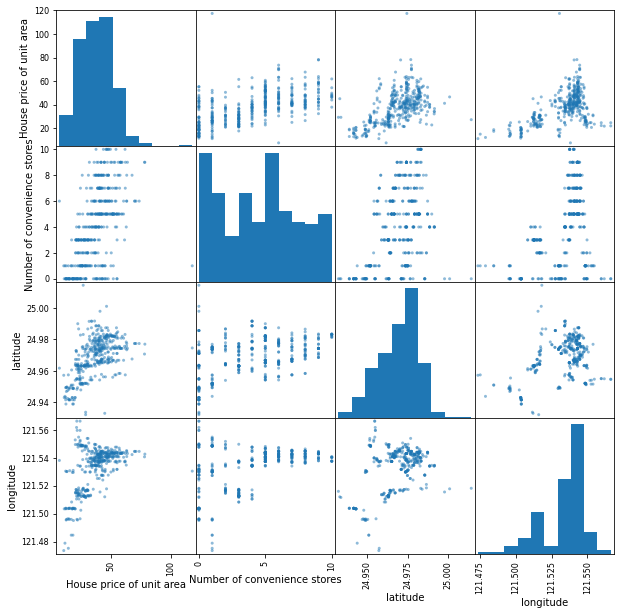

In [103]:
from pandas.plotting import scatter_matrix
attributes = ["House price of unit area", "Number of convenience stores", "latitude",
              "longitude"]
scatter_matrix(df[attributes], figsize=(10, 10))

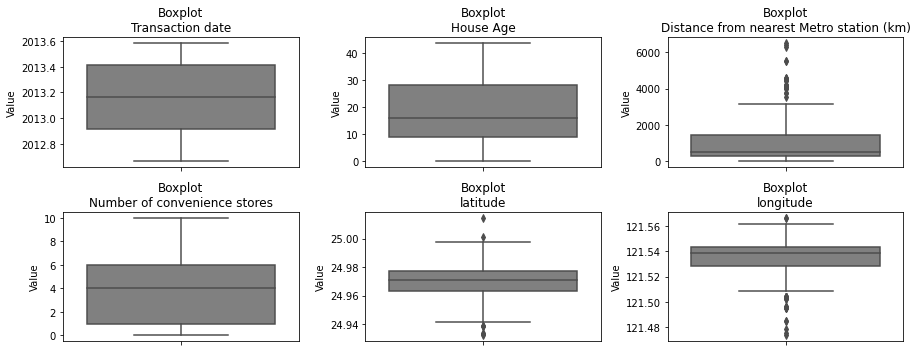

In [104]:
plt.figure(figsize=(13,5))
for feat, grd in zip(df, range(231,237)):
    plt.subplot(grd)
    sns.boxplot(y=df[feat], color='grey')
    plt.ylabel('Value')
    plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

#splitting the data

In [105]:
X = df.drop(['House price of unit area'], axis=1)
X.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491


In [106]:
Y = df['House price of unit area']
print(Y.head())

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 8)
(83, 8)
(331,)
(83,)


In [108]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.fit_transform(X_test)
print(X_train[0:5,:])
print('------------')
print(X_test[0:5,:])

[[ 1.2196313  -0.07552232  0.94057325 -0.35081487 -0.79685609 -1.28125172
   1.25111844  0.36145855]
 [ 0.92323056 -1.13888517  0.93091517 -0.35081487 -0.45900192 -1.41804531
   0.02952492  1.6014433 ]
 [ 1.2196313   1.85625352 -0.53058532 -1.38452158  0.2080435   0.07616157
   0.02952492  0.6191921 ]
 [ 0.92323056  0.21690246 -0.37068126  0.33832294  0.0946379   0.88113922
  -1.1920686  -1.37681108]
 [ 1.2196313  -0.36794711  0.0465814  -0.00624596  1.77918354  0.06498133
  -1.1920686  -1.19067018]]
------------
[[-1.00645001 -0.76060015 -0.61489165 -1.10416017  0.44073141 -0.2871079
  -1.27410903 -1.51256528]
 [ 0.77089766  0.41690622  2.77470062 -1.42914348 -1.96934251 -2.42635266
  -0.04444566  1.49393041]
 [ 0.77089766  1.31937461 -0.52576304  0.52075639  0.79827975  0.45601154
  -0.04444566 -0.19179261]
 [ 0.77089766  0.55442522  2.76842049 -1.42914348 -1.89278934 -2.45237136
  -1.27410903 -1.50677241]
 [ 1.363347   -0.40820773 -0.64745615 -1.10416017  0.39750139 -0.29979995
   1

#**LINEAR REGRESSION**

In [109]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [110]:
y_pred_lr = lr.predict(X_test)

In [111]:
print(len(y_pred_lr))
print(len(y_test))
print(y_pred_lr[0:5])
print(y_test[0:5])

83
83
[40.11316542 12.13722991 41.99419569 12.25088511 42.40242765]
356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
Name: House price of unit area, dtype: float64


In [112]:
print(mean_absolute_percentage_error(y_test, y_pred_lr))

0.1702244124263701


In [113]:
train_accuracy_lr = lr.score(X_train , y_train)
train_accuracy_lr

0.5648585181557466

In [114]:
test_accuracy_lr = lr.score(X_test,y_test)
test_accuracy_lr

0.6551099986447684

In [115]:
cross_val_score_train_lr = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
cross_val_score_train_lr.mean()

0.5459289949379952

In [116]:
c_lr = pd.DataFrame(y_pred_lr, columns=['Estimated Price'])
c_lr.head()

,Estimated Price
0,40.113165
1,12.137230
2,41.994196
3,12.250885
4,42.402428


In [117]:
d = pd.DataFrame(y_test)
d = y_test.reset_index(drop=True)
d.head()

0    45.3
1    14.4
2    46.0
3    15.6
4    50.2
Name: House price of unit area, dtype: float64

In [118]:
ynew_lr = pd.concat([c_lr,d], axis=1)
ynew_lr

,Estimated Price,House price of unit area
0,40.113165,45.3
1,12.137230,14.4
2,41.994196,46.0
3,12.250885,15.6
4,42.402428,50.2
...,...,...
78,47.183339,53.0
79,45.075743,38.2
80,46.769431,46.7
81,28.399269,24.6


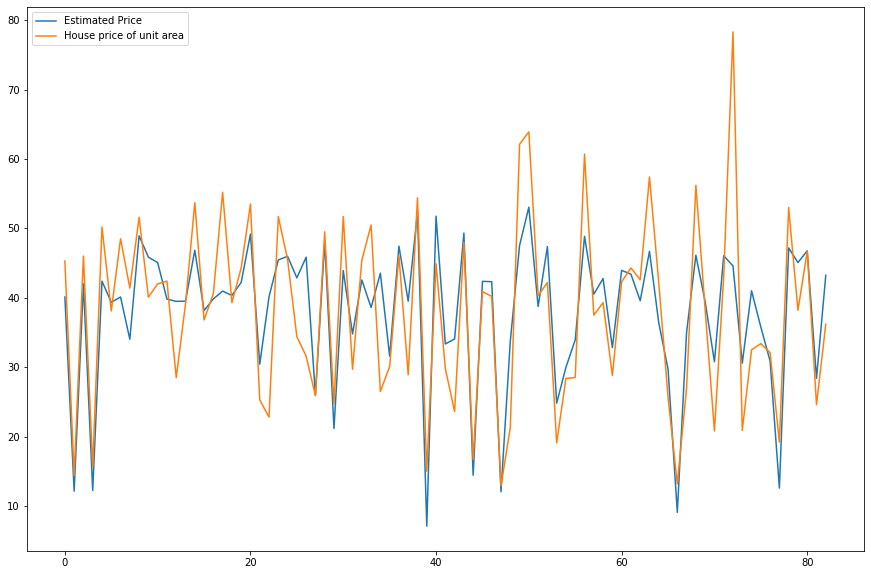

In [119]:
ynew_lr.plot(figsize=(15,10))

#**DECISION TREE**

In [120]:
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [121]:
dt_y_pred = dt.predict(X_test)
dt_y_pred

array([117.5       ,  15.55      ,  37.53333333,  13.4       ,
        29.3       ,  37.53333333,  46.6       ,  37.53333333,
        54.63333333,  40.86842105,  50.50833333,  33.6       ,
       117.5       ,  37.1       ,  57.95      ,  47.3       ,
        37.53333333, 117.5       ,  50.50833333,  37.1       ,
        45.8       ,  27.91578947,  34.1       ,  40.86842105,
        47.7       ,  40.86842105,  40.86842105,  17.7       ,
        56.88      ,  24.55333333,  33.6       ,  34.65      ,
       117.5       ,  47.3       ,  40.86842105,  27.91578947,
        39.95      ,  31.4       ,  50.50833333,  17.4       ,
        45.02      ,  37.53333333,  21.7       ,  50.92857143,
        15.55      ,  33.6       ,  37.53333333,  15.55      ,
        24.55333333,  33.6       ,  50.50833333,  37.53333333,
        40.86842105,  25.4       ,  27.91578947,  37.53333333,
        49.        ,  37.53333333,  48.12      ,  34.65      ,
        54.8       ,  41.        ,  40.86842105,  57.95

In [122]:
print(len(dt_y_pred))
print(len(y_test))
print(dt_y_pred[0:5])
print(y_test[0:5])

83
83
[117.5         15.55        37.53333333  13.4         29.3       ]
356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
Name: House price of unit area, dtype: float64


In [123]:
print(mean_absolute_percentage_error(y_test, dt_y_pred))

0.23859002980578356


In [124]:
train_accuracy_dt = dt.score(X_train , y_train)
train_accuracy_dt

0.9664797293294856

In [125]:
cross_val_score_train_dt = cross_val_score(dt, X_train, y_train, cv=10, scoring='r2')
cross_val_score_train_dt.mean()

0.48302006327833424

In [126]:
c_dt = pd.DataFrame(dt_y_pred, columns=['Estimated Price'])
c_dt.head()

,Estimated Price
0,117.500000
1,15.550000
2,37.533333
3,13.400000
4,29.300000


In [127]:
d = pd.DataFrame(y_test)
d = y_test.reset_index(drop=True)
d.head()

0    45.3
1    14.4
2    46.0
3    15.6
4    50.2
Name: House price of unit area, dtype: float64

In [128]:
ynew_dt = pd.concat([c_dt,d], axis=1)
ynew_dt

,Estimated Price,House price of unit area
0,117.500000,45.3
1,15.550000,14.4
2,37.533333,46.0
3,13.400000,15.6
4,29.300000,50.2
...,...,...
78,40.868421,53.0
79,31.100000,38.2
80,40.868421,46.7
81,27.915789,24.6


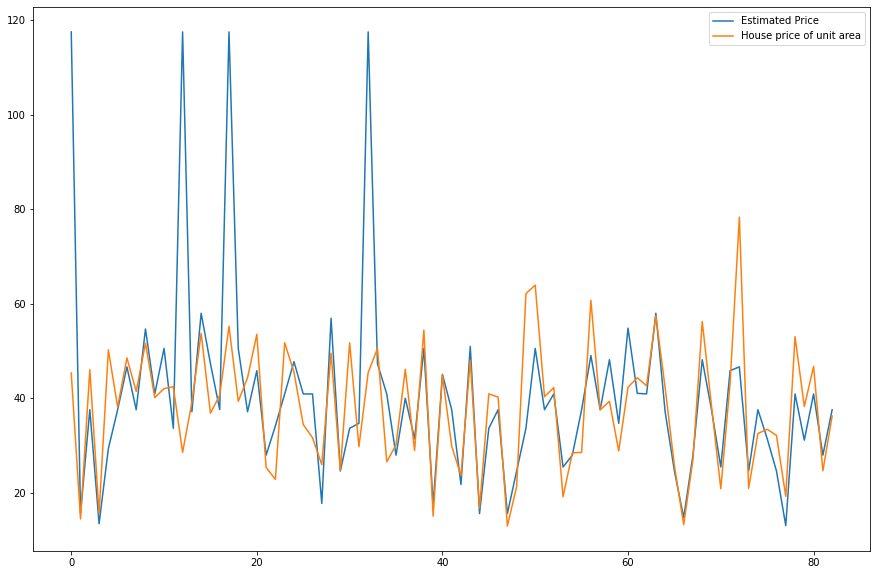

In [129]:
ynew_dt.plot(figsize=(15,10))

#**RANDOM FOREST**

In [130]:
rft = RandomForestRegressor(30)
rft.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [131]:
rft_y_pred = rft.predict(X_test)
rft_y_pred

array([68.86333333, 16.54666667, 38.97333333, 14.61      , 42.49      ,
       36.21      , 43.25      , 38.02      , 51.46666667, 43.90666667,
       42.15      , 33.59      , 80.76333333, 42.66      , 54.16333333,
       44.01666667, 36.26333333, 71.16      , 41.56666667, 44.38333333,
       49.67666667, 23.25666667, 30.61666667, 44.86      , 55.38      ,
       41.12333333, 45.99      , 23.99333333, 50.41      , 24.67333333,
       44.18666667, 26.37666667, 72.63333333, 44.27      , 41.55333333,
       23.96333333, 43.91      , 28.45666667, 50.95      , 16.86      ,
       48.40333333, 38.00333333, 27.39666667, 47.76666667, 16.92333333,
       44.09      , 40.75333333, 16.69333333, 26.05666667, 46.63      ,
       54.07      , 40.89666667, 41.65      , 19.76666667, 22.56666667,
       35.61333333, 51.96      , 37.98333333, 47.61666667, 24.96666667,
       45.57      , 41.72666667, 40.51333333, 53.15333333, 41.97      ,
       25.08      , 15.59333333, 26.4       , 50.83      , 36.5 

In [132]:
print(len(rft_y_pred))
print(len(y_test))
print(rft_y_pred[0:5])
print(y_test[0:5])

83
83
[68.86333333 16.54666667 38.97333333 14.61       42.49      ]
356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
Name: House price of unit area, dtype: float64


In [133]:
mean_absolute_percentage_error(y_test, rft_y_pred)

0.1596819759876141

In [134]:
train_accuracy_rft = rft.score(X_train , y_train)
train_accuracy_rft

0.9406728271846694

In [135]:
cross_val_score_train_rft = cross_val_score(rft, X_train, y_train, cv=10, scoring='r2')
cross_val_score_train_rft.mean()

0.6897483089043354

In [136]:
c_rft = pd.DataFrame(rft_y_pred, columns=['Estimated Price'])
c_rft.head()

,Estimated Price
0,68.863333
1,16.546667
2,38.973333
3,14.610000
4,42.490000


In [137]:
d = pd.DataFrame(y_test)
d = y_test.reset_index(drop=True)
d.head()

0    45.3
1    14.4
2    46.0
3    15.6
4    50.2
Name: House price of unit area, dtype: float64

In [138]:
ynew_rft = pd.concat([c_rft,d], axis=1)
ynew_rft

,Estimated Price,House price of unit area
0,68.863333,45.3
1,16.546667,14.4
2,38.973333,46.0
3,14.610000,15.6
4,42.490000,50.2
...,...,...
78,46.066667,53.0
79,32.810000,38.2
80,44.040000,46.7
81,22.766667,24.6


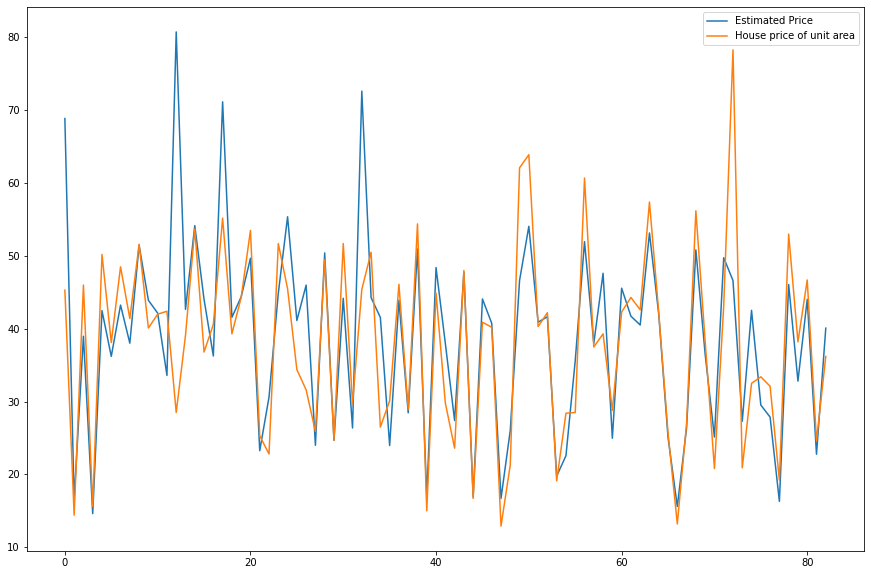

In [139]:
ynew_rft.plot(figsize=(15,10))

#**SVM**

In [140]:
SVM_model = svm.SVR()
SVM_model.fit(X_train,y_train)

SVR()

In [141]:
SVM_y_pred = SVM_model.predict(X_test)
SVM_y_pred

array([36.91624409, 23.33898596, 40.8663462 , 23.87722695, 39.08062345,
       38.91255022, 39.56906171, 34.54867584, 46.13785969, 44.58760431,
       43.3545394 , 36.40606807, 36.84015972, 37.76506745, 47.5828758 ,
       35.99242095, 39.35214072, 38.62091222, 40.36976433, 40.98490046,
       43.37751212, 27.80739201, 38.10196785, 45.60306059, 42.41638663,
       42.14015513, 41.97425021, 26.28873168, 48.13896957, 26.48988212,
       37.2540583 , 32.22361551, 40.35611806, 36.67893333, 44.88570938,
       29.26089889, 41.70970266, 33.60384282, 48.09888712, 28.41716754,
       46.55692935, 35.29188558, 31.32544831, 41.39643249, 23.06169195,
       37.60451943, 40.22599694, 24.00841706, 27.76473095, 38.29470624,
       47.25718305, 38.59160721, 45.72326084, 25.50010617, 28.19670127,
       34.60081101, 43.3235022 , 40.17115443, 44.25169372, 30.57086033,
       39.50365663, 38.40034384, 36.07554798, 44.45536842, 36.83327321,
       25.84843781, 23.30986915, 31.20945321, 44.82917847, 40.05

In [142]:
print(len(SVM_y_pred))
print(len(y_test))
print(SVM_y_pred[0:5])
print(y_test[0:5])

83
83
[36.91624409 23.33898596 40.8663462  23.87722695 39.08062345]
356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
Name: House price of unit area, dtype: float64


In [143]:
print(mean_absolute_percentage_error(y_test, SVM_y_pred))

0.1977320383786259


In [144]:
train_accuracy_SVM_model = SVM_model.score(X_train , y_train)
train_accuracy_SVM_model

0.5605776967143801

In [145]:
cross_val_score_train_svm = cross_val_score(SVM_model, X_train, y_train, cv=10, scoring='r2')
cross_val_score_train_svm.mean()

0.5364095333698836

In [146]:
c_svm = pd.DataFrame(SVM_y_pred, columns=['Estimated Price'])
c_svm.head()

,Estimated Price
0,36.916244
1,23.338986
2,40.866346
3,23.877227
4,39.080623


In [147]:
d = pd.DataFrame(y_test)
d = y_test.reset_index(drop=True)
d.head()

0    45.3
1    14.4
2    46.0
3    15.6
4    50.2
Name: House price of unit area, dtype: float64

In [148]:
ynew_svm = pd.concat([c_svm,d], axis=1)
ynew_svm

,Estimated Price,House price of unit area
0,36.916244,45.3
1,23.338986,14.4
2,40.866346,46.0
3,23.877227,15.6
4,39.080623,50.2
...,...,...
78,42.366956,53.0
79,40.983699,38.2
80,44.741467,46.7
81,28.137590,24.6


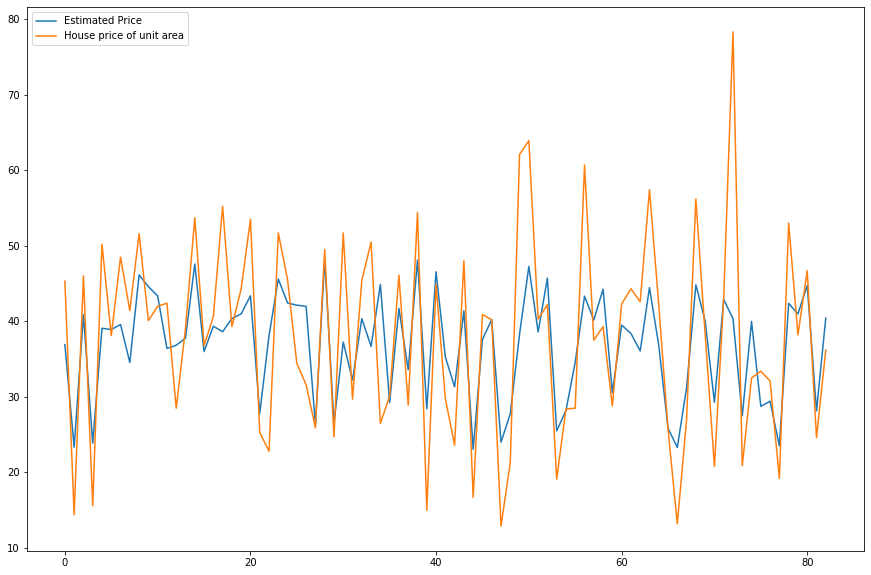

In [149]:
ynew_svm.plot(figsize=(15,10))

#**KNN**

In [150]:
model_knn = knn(n_neighbors=3,p=1,algorithm='brute')
model_knn.fit(X_train,y_train) 

KNeighborsRegressor(algorithm='brute', n_neighbors=3, p=1)

In [151]:
y_pred_knn = model_knn.predict(X_test)

In [152]:
model_knn.score(X_train,y_train)

0.7846233348265925

In [153]:
model_knn.score(X_test,y_test)

0.5986657362624354

In [154]:
k_values = np.arange(1,100,2)

In [155]:
train_score_arr = []
val_score_arr = []
for k in k_values:    
    model2 = knn(n_neighbors=k,p=1)
    model2.fit(X_train,y_train)    
    train_score = model2.score(X_train,y_train) 
    train_score_arr.append(train_score*100)    
    val_score = model2.score(X_test, y_test)
    val_score_arr.append(val_score*100)    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=42.01%
k=3, train_accuracy=78.46%, test_accuracy=59.87%
k=5, train_accuracy=74.36%, test_accuracy=62.13%
k=7, train_accuracy=71.00%, test_accuracy=63.78%
k=9, train_accuracy=68.57%, test_accuracy=63.97%
k=11, train_accuracy=67.82%, test_accuracy=63.21%
k=13, train_accuracy=66.13%, test_accuracy=63.25%
k=15, train_accuracy=64.57%, test_accuracy=65.37%
k=17, train_accuracy=64.63%, test_accuracy=66.47%
k=19, train_accuracy=64.11%, test_accuracy=66.08%
k=21, train_accuracy=63.47%, test_accuracy=66.03%
k=23, train_accuracy=62.82%, test_accuracy=65.26%
k=25, train_accuracy=62.17%, test_accuracy=65.31%
k=27, train_accuracy=61.55%, test_accuracy=64.99%
k=29, train_accuracy=60.85%, test_accuracy=64.84%
k=31, train_accuracy=60.33%, test_accuracy=65.37%
k=33, train_accuracy=59.80%, test_accuracy=64.60%
k=35, train_accuracy=59.56%, test_accuracy=63.53%
k=37, train_accuracy=59.20%, test_accuracy=63.16%
k=39, train_accuracy=58.26%, test_accuracy=62.40%
k=41

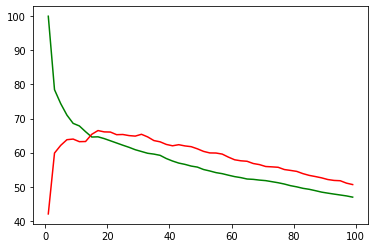

In [156]:
plt.plot(k_values,train_score_arr,'g')
plt.plot(k_values,val_score_arr,'r')

In [157]:
cross_val_score_train_knn = cross_val_score(model_knn, X_train, y_train, cv=10, scoring='r2')
cross_val_score_train_knn.mean()

0.5582660996332651

In [158]:
print(r2_score(y_test, y_pred_knn))

0.5986657362624354


In [159]:
c_knn = pd.DataFrame(y_pred_knn, columns=['Estimated Price'])
c_knn.head()

,Estimated Price
0,35.933333
1,20.966667
2,38.166667
3,19.800000
4,63.300000


In [160]:
d = pd.DataFrame(y_test)
d = y_test.reset_index(drop=True)
d.head()

0    45.3
1    14.4
2    46.0
3    15.6
4    50.2
Name: House price of unit area, dtype: float64

In [161]:
ynew_knn = pd.concat([c_knn,d], axis=1)
ynew_knn

,Estimated Price,House price of unit area
0,35.933333,45.3
1,20.966667,14.4
2,38.166667,46.0
3,19.800000,15.6
4,63.300000,50.2
...,...,...
78,54.000000,53.0
79,41.933333,38.2
80,45.100000,46.7
81,27.600000,24.6


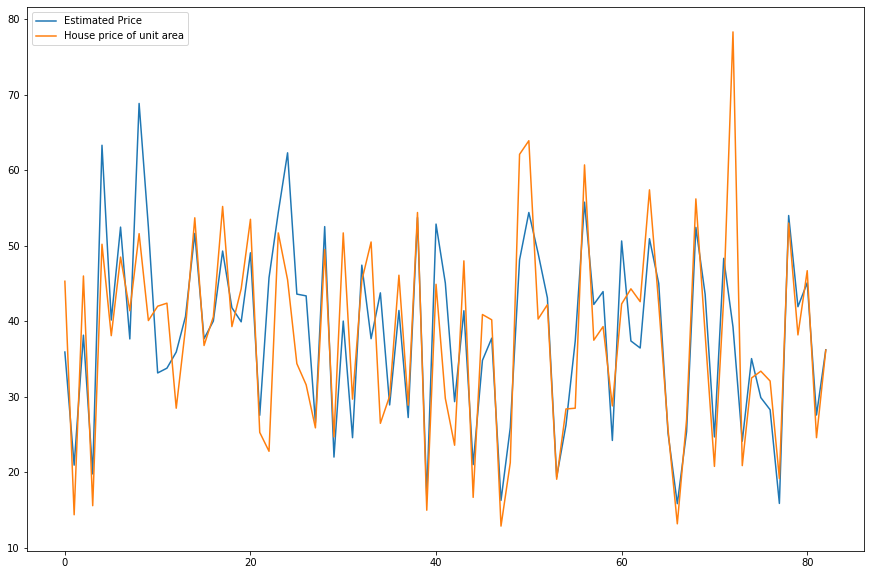

In [162]:
ynew_knn.plot(figsize=(15,10))